# MSDS 422-57 Assignment 6- Prerak, Mehta

## Introduction / Summary

In this assignment we will again work with digit images and its pixel data. Just like the previous assignment we will use a predictive movel to predict the labels of images from a test data set. Although this time we will use keras and tensorflow in python and work and start working rudimentarily with the neural networks. We will build 4 different neural network models with different dropout layers and nodes per layers and see which model gives us the highest accuracy. We will use that models to predict the target labels of the test data set. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle   
import sys
import os
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import time
import tensorflow as tf

In [7]:
tf.__version__

'2.2.0'

In [8]:
with open('assign-6-train.pickle','rb') as inFile:
    imageData=pickle.load(inFile)

In [273]:
print(imageData.head())

       label  pixel0  pixel1  pixel2  ...  pixel781  pixel782  pixel783  imageID
40162      2       0       0       0  ...         0         0         0    35236
36992      1       0       0       0  ...         0         0         0    37344
39884      1       0       0       0  ...         0         0         0    21045
10946      0       0       0       0  ...         0         0         0    18934
13921      2       0       0       0  ...         0         0         0     5414

[5 rows x 786 columns]


In [10]:
#Should be true if the Data is a pd DataFrame.
print(isinstance(imageData,pd.DataFrame))   
#information on the shape of the dataset
print(imageData.shape)
#Columns in the dataset that provide feature information that will be useful in modeling
print(imageData.columns)

True
(40320, 786)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'imageID'],
      dtype='object', length=786)


### Notes
- Train 4 different models. 1st with 2 dropout layers and 10 nodes, second with 2 dropout layers and 20 nodes, third with 5 dropout layers with 10 nodes and lastly fourth one with 5 dropout layers and 20 nodes.
- It is necessary to scale the data for better accuracy and hence we will use MinMaxScaler to scale all the train-test split data for 4 models.
- Since we will be using the hyperparameter of loss as 'categorical_crossentropy' as we are dealing with a target variable that has 10 different labels, we have to convert the nx1 array of target variable into a nx10 array with binary values assigned to each target variable (essentially applying onehotencoder). In this assignment we will use a keras function 'utils.to_catergorical' to serve this purpose. We will use num_classes =20 as a hyperparameter in that function for both models that utilizes 20 nodes per layer. This is because the prediction will be a nx20 array of target label probababilities.
- Later we will train the model with respect to their hyperparameters, compile, and fit. We will clock the run time of how long it takes the model to fit. 
- We will also get the target labels from the y_pred variable using the numpy argmax function and visualize using a confusion matrix along with the train and test accuracy.
- We will also validate the model on train and test accuracies using the inside hyperparameters of the function. 
- Later we will use the above 2 features for each of the 4 models to plot a graph for the test and train accuracies.
- Lastly we will use the model with the best accuracy to predict the target labels of the test pickle file.            

### Model 1: 2 Layers, 10 Nodes

In [242]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = imageData.iloc[:, 1:-1].values
y = imageData.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

scaler=preprocessing.MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train1 = tf.keras.utils.to_categorical(y_train)
y_testconv1 = tf.keras.utils.to_categorical(y_test)

In [243]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(10, activation='relu'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))


In [244]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy','FalsePositives'])

In [245]:
start_time = time.clock()

Model_1 = model1.fit(X_train, y_train1, epochs = 15, verbose = 0, validation_data = (X_test, y_testconv1),)

end_time = time.clock()
runtime1 = end_time - start_time
print("\nProcessing time For Model 1 (seconds): %f" % runtime1)


Processing time For Model 1 (seconds): 27.308569


In [246]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred1 = model1.predict(X_test)
y_pred1_train = model1.predict(X_train)
y_pred1 = np.argmax(y_pred1, axis=1)
y_pred1_train = np.argmax(y_pred1_train, axis=1)

cm = confusion_matrix(y_test, y_pred1)
accuracy_score1_train = accuracy_score(y_train, y_pred1_train)
accuracy_score1 = accuracy_score(y_test, y_pred1)
print('Confusion Matrix of test set: \n', cm)
print('Accuracy score for Model 1 Test Set: ', accuracy_score(y_test, y_pred1))
print('Accuracy score for Model 1 Train Set: ', accuracy_score(y_train, y_pred1_train))

Confusion Matrix of test set: 
 [[772   0   4   1   2   9   6   5   2   4]
 [  0 873   5   3   1   4   0   4   6   3]
 [  9   5 678  21  11   1  10  13  12   3]
 [  1   3  21 752   1  40   5   9  11   3]
 [  2   3   6   0 737   1   8   6   2  27]
 [  3   2   0  26   6 696   7   4   8   5]
 [  4   0   5   0   8   5 726   0   4   0]
 [  3   2   8   1   8   3   0 807   0  21]
 [  5   6  11  40   1  18  11   4 692  13]
 [  3   2   2   9  16   5   0  26   9 724]]
Accuracy score for Model 1 Test Set:  0.9247271825396826
Accuracy score for Model 1 Train Set:  0.9505208333333334


In [247]:
Model1_accResults =pd.DataFrame(Model_1.history["accuracy"])
Model1_vaccResults =pd.DataFrame(Model_1.history["val_accuracy"])


### Model 2: 2 Layes, 20 Nodes

In [248]:
X = imageData.iloc[:, 1:-1].values
y = imageData.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train2 = tf.keras.utils.to_categorical(y_train, num_classes = 20)
y_testconv2 = tf.keras.utils.to_categorical(y_test, num_classes = 20)

In [249]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(20, activation='relu'))
model2.add(tf.keras.layers.Dense(20, activation='softmax'))

model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy','FalsePositives'])

start_time = time.clock()

Model_2 = model2.fit(X_train, y_train2, epochs = 15, verbose = 0, validation_data = (X_test, y_testconv2),)

end_time = time.clock()
runtime2 = end_time - start_time
print("\nProcessing time For Model 2 (seconds): %f" % runtime2)


Processing time For Model 2 (seconds): 27.094187


In [250]:
y_pred2 = model2.predict(X_test)
y_pred2_train = model2.predict(X_train)
y_pred2 = np.argmax(y_pred2, axis=1)
y_pred2_train = np.argmax(y_pred2_train, axis=1)

cm = confusion_matrix(y_test, y_pred2)
accuracy_score2_train = accuracy_score(y_train, y_pred2_train)
accuracy_score2 = accuracy_score(y_test, y_pred2)
print('Confusion Matrix of test set: \n', cm)
print('Accuracy score for Model 2 Test Set: ', accuracy_score(y_test, y_pred2))
print('Accuracy score for Model 2 Train Set: ', accuracy_score(y_train, y_pred2_train))

Confusion Matrix of test set: 
 [[780   0   1   1   1   5   9   2   4   2]
 [  0 871   9   1   0   5   2   4   3   4]
 [  2   2 729   5   6   1   3   6   7   2]
 [  5   3  18 768   0  29   0   7  14   2]
 [  1   3   7   0 743   2   6   1   2  27]
 [  3   0   1  16   2 712   4   1  10   8]
 [  4   0   6   0   2   2 736   0   1   1]
 [  4   1   5   7   5   2   0 815   0  14]
 [  2  11  11  10   3  18   6   2 728  10]
 [  3   1   1   6  11   3   0  10   4 757]]
Accuracy score for Model 2 Test Set:  0.947296626984127
Accuracy score for Model 2 Train Set:  0.9743923611111112


In [251]:
Model2_accResults = pd.DataFrame(Model_2.history["accuracy"])
Model2_vaccResults = pd.DataFrame(Model_2.history["val_accuracy"])

### Model 3: 5 Layes, 10 Nodes

In [252]:
X = imageData.iloc[:, 1:-1].values
y = imageData.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train3 = tf.keras.utils.to_categorical(y_train)
y_testconv3 = tf.keras.utils.to_categorical(y_test)

In [253]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(10, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy','FalsePositives'])

start_time = time.clock()

Model_3 = model3.fit(X_train, y_train3, epochs = 15, verbose = 0, validation_data = (X_test, y_testconv3),)

end_time = time.clock()
runtime3 = end_time - start_time
print("\nProcessing time For Model 3 (seconds): %f" % runtime3)


Processing time For Model 3 (seconds): 31.068785


In [254]:
y_pred3 = model3.predict(X_test)
y_pred3_train = model3.predict(X_train)
y_pred3 = np.argmax(y_pred3, axis=1)
y_pred3_train = np.argmax(y_pred3_train, axis=1)

cm = confusion_matrix(y_test, y_pred3)
accuracy_score3_train = accuracy_score(y_train, y_pred3_train)
accuracy_score3 = accuracy_score(y_test, y_pred3)
print('Confusion Matrix of test set: \n', cm)
print('Accuracy score for Model 3 Test Set: ', accuracy_score(y_test, y_pred3))
print('Accuracy score for Model 3 Train Set: ', accuracy_score(y_train, y_pred3_train))

Confusion Matrix of test set: 
 [[757   0   3   0   3  17  10   5  10   0]
 [  0 865   5   4   2   4   2   5   6   6]
 [  6   9 650   7  13   1  16  27  30   4]
 [  2   5  18 724   1  44   5  12  29   6]
 [  0   1   3   0 765   0   9   0   1  13]
 [  8   0   4  18   6 677   7   4  22  11]
 [  4   1   1   0   9   5 726   0   6   0]
 [  2   3   4   3  10   0   0 800   1  30]
 [  2  10   2   7  12  10   9   4 725  20]
 [  1   0   0  10  70   4   0  12   5 694]]
Accuracy score for Model 3 Test Set:  0.9155505952380952
Accuracy score for Model 3 Train Set:  0.9396701388888888


In [255]:
Model3_accResults = pd.DataFrame(Model_3.history["accuracy"])
Model3_vaccResults = pd.DataFrame(Model_3.history["val_accuracy"])

### Model 4: 5 Layes, 20 Nodes


In [256]:
X = imageData.iloc[:, 1:-1].values
y = imageData.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train4 = tf.keras.utils.to_categorical(y_train, num_classes = 20)
y_testconv4 = tf.keras.utils.to_categorical(y_test, num_classes = 20)

In [257]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(20, activation='relu'))
model4.add(tf.keras.layers.Dense(20, activation='relu'))
model4.add(tf.keras.layers.Dense(20, activation='relu'))
model4.add(tf.keras.layers.Dense(20, activation='relu'))
model4.add(tf.keras.layers.Dense(20, activation='softmax'))

model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy','FalsePositives'])

start_time = time.clock()

Model_4 = model4.fit(X_train, y_train4, epochs = 15, verbose = 0, validation_data = (X_test, y_testconv4),)

end_time = time.clock()
runtime4 = end_time - start_time
print("\nProcessing time For Model 4 (seconds): %f" % runtime4)


Processing time For Model 4 (seconds): 30.826981


In [258]:
y_pred4 = model4.predict(X_test)
y_pred4_train = model4.predict(X_train)
y_pred4 = np.argmax(y_pred4, axis=1)
y_pred4_train = np.argmax(y_pred4_train, axis=1)

cm = confusion_matrix(y_test, y_pred4)
accuracy_score4_train = accuracy_score(y_train, y_pred4_train)
accuracy_score4 = accuracy_score(y_test, y_pred4)
print('Confusion Matrix of test set: \n', cm)
print('Accuracy score for Model 4 Test Set: ', accuracy_score(y_test, y_pred4))
print('Accuracy score for Model 4 Train Set: ', accuracy_score(y_train, y_pred4_train))

Confusion Matrix of test set: 
 [[784   0   0   3   0   6   9   1   2   0]
 [  0 880   5   4   0   4   0   2   1   3]
 [  5   7 708   6   8   3   6  12   6   2]
 [  0   3  10 786   0  29   5   2   8   3]
 [  4   2   2   0 759   1   7   1   0  16]
 [  1   2   0  12   0 730   8   0   0   4]
 [  3   0   3   0   2   6 738   0   0   0]
 [  1   4   2   4   2   5   1 824   0  10]
 [  2  12   3  18   3  14   8   0 736   5]
 [  3   1   0  11  25   5   1   8   6 736]]
Accuracy score for Model 4 Test Set:  0.9525049603174603
Accuracy score for Model 4 Train Set:  0.9789806547619048


In [259]:
Model4_accResults = pd.DataFrame(Model_4.history["accuracy"])
Model4_vaccResults = pd.DataFrame(Model_4.history["val_accuracy"])

In [260]:
#Reference and credit to Karen O'brien from the assignment huddle. 
epochs = 15

accResults = pd.concat([Model1_accResults, Model2_accResults, 
                        Model3_accResults, Model4_accResults], axis=1)
accResults.columns =["Model 1 Training Accuracy", "Model 2 Training Accuracy", 
                     "Model 3 Training Accuracy", "Model 4 Training Accuracy"] 
accResults.index =(np.arange(1, ((epochs)+1), step=1)) #this resets the index to epoch number

vaccResults = pd.concat([Model1_vaccResults, Model2_vaccResults, 
                         Model3_vaccResults, Model4_vaccResults], axis=1)
vaccResults.columns =["Model 1 Test Accuracy", "Model 2 Test Accuracy", 
                      "Model 3 Tes Accuracy", "Model 4 Test Accuracy"] 
vaccResults.index =(np.arange(1, ((epochs)+1), step=1))


<Figure size 1512x432 with 0 Axes>

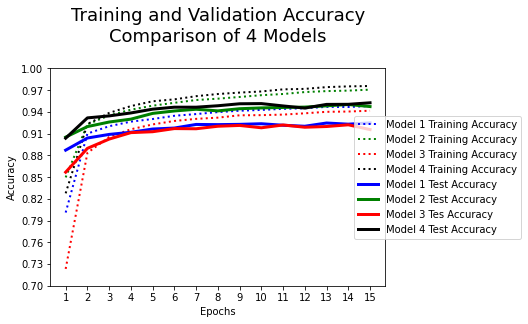

In [261]:
four_colors = ["Blue", "Green", "Red", "Black"]

fig = plt.figure(figsize=(21,6));  
ax1 = accResults.plot(kind='line', lw=2, style=':', color=(four_colors)); 
vaccResults.plot(kind='line', lw=3, color=(four_colors), ax=ax1); 
plt.title("Training and Validation Accuracy\nComparison of 4 Models\n", size=18);
plt.legend(loc='center right', bbox_to_anchor=(1.42, 0.5)); 
plt.xticks(np.arange(1, ((epochs)+1), step=1));
plt.yticks(np.arange(0.70, 1.01, step=0.03)); 
plt.xlabel('Epochs'); 
plt.ylabel('Accuracy');
plt.show()

In [264]:
data = {'Number of Layers': ['2','2','5','5'],
        'Nodes per Layer': ['10','20','10','20'],
        'Processing Time': [runtime1,runtime2,runtime3,runtime4],
        'Training Set Accuracy': [accuracy_score1_train,accuracy_score2_train,accuracy_score3_train,accuracy_score4_train],
        'Test Set Accuracy': [accuracy_score1,accuracy_score2,accuracy_score3,accuracy_score4]}

df= pd.DataFrame(data)

df

,Number of Layers,Nodes per Layer,Processing Time,Training Set Accuracy,Test Set Accuracy
0,2,10,27.308569,0.950521,0.924727
1,2,20,27.094187,0.974392,0.947297
2,5,10,31.068785,0.939670,0.915551
3,5,20,30.826981,0.978981,0.952505


#### From the above graph and data table we can clearly see that the accuracy of the 4th model with 5 layers and 20 nodes per layer provides the highest accuracy and hence we will use that to predict values for the test data.

In [240]:
with open('assign-6-test.pickle','rb') as inFile:
    imageDataTest=pickle.load(inFile)

In [241]:
#Should be true if the Data is a pd DataFrame.
print(isinstance(imageDataTest,pd.DataFrame))   
#information on the shape of the dataset
print(imageDataTest.shape)
#Columns in the dataset that provide feature information that will be useful in modeling
print(imageDataTest.columns)

True
(1680, 786)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'imageID'],
      dtype='object', length=786)


In [271]:
X_testfinal = imageDataTest.iloc[:, 1:-1].to_numpy()

y_predtest = model4.predict(X_testfinal)

y_predtest = np.argmax(y_predtest, axis=1)

imageID = imageDataTest.iloc[:, -1].values

ar = np.concatenate((imageID.reshape(len(imageID),1), y_predtest.reshape(len(y_predtest),1)),1)

FinalDf = pd.DataFrame(data=ar, columns = ['imageID','label'])
FinalDf.rename(columns = {"0":"imageID","1":"label"})


,imageID,label
0,31806,2
1,35802,6
2,8948,4
3,38878,1
4,16133,2
...,...,...
1675,12275,4
1676,33774,1
1677,35591,3
1678,9455,6


In [272]:
FinalDf.to_csv('mehta.assign-6-predictions.csv')

### Conclusion and Assignment Discussion

This assignment was similar yet different than all the assignment before. It included training, fitting and evaluating the model performance just like before. However the concept of neural network is totally different as it is closest to how a human brain classifies things they see and interpret. Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data and label them. They recognize patterns and upon adding more layers and nodes it avoids overfitting of the data which is contrary to the previous conception I had "training a model over and over again on the same data set results into overfitting". They recognize patterns in numerical values, contained in vectors, translated from various real-world non-numeric data. For example: images, sound, text, time series, etc. Neural networks help us cluster and classify. I believe this could be the stepping stone for entering into artificial intelligence and natural language processing. 